In [216]:
%pip install numpy tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\nicho\appdata\local\programs\python\python311\lib\site-packages (1.26.4)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [217]:
%pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
blinker                      1.8.2
certifi                      2024.8.30
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
executing                    2.1.0
Flask                        3.0.3
Flask-Cors                   5.0.0
flask-marshmallow            1.2.1
Flask-SQLAlchemy             3.1.1
flatbuffers                  24.3.25
fonttools                    4.54.1
gast                         0.6.0
google-pasta                 0.2.0
greenlet                     3.1.1
grpcio                       1.66.2
h5py                         3.12.1
idna                         3.10
ipy

In [218]:
import os
import tensorflow as tf
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [219]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [220]:
data_dir = 'data/chest_xray'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

In [221]:
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [222]:
os.listdir(val_dir)

['NORMAL', 'PNEUMONIA']

In [223]:
os.listdir(test_dir)

['NORMAL', 'PNEUMONIA']

In [224]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)
val_data = tf.keras.utils.image_dataset_from_directory(val_dir)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [225]:
train_data_iterator = train_data.as_numpy_iterator()


In [226]:
batch = train_data_iterator.next()

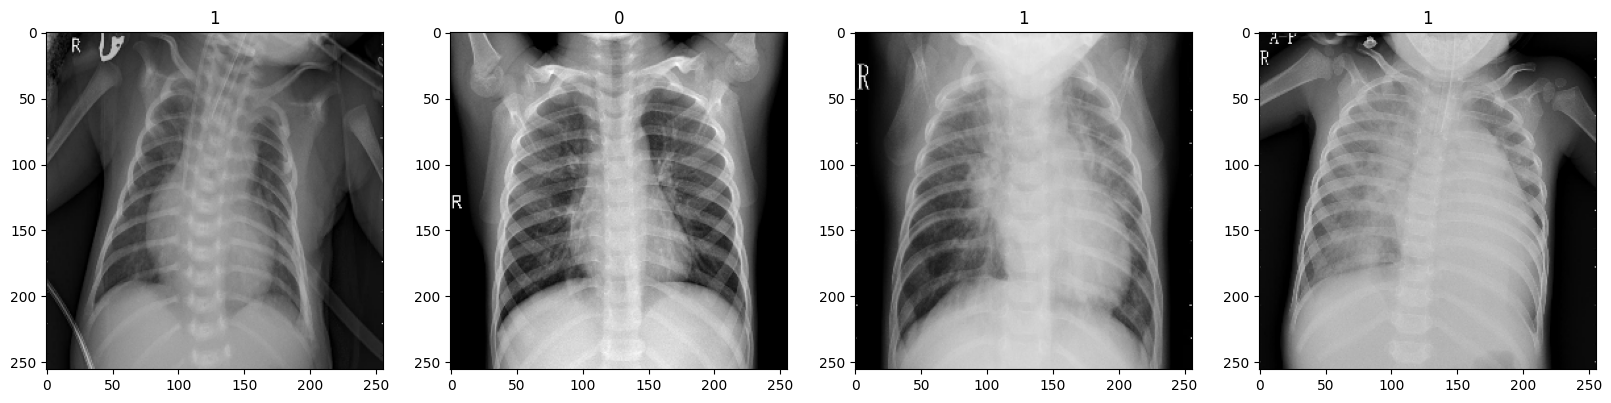

In [227]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [228]:
train_data = train_data.map(lambda x, y: (x/255,y))
val_data = val_data.map(lambda x, y: (x/255,y))
test_data = test_data.map(lambda x, y: (x/255,y))

In [229]:
len(train_data)

163

In [230]:
model = Sequential()

In [231]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [232]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [233]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,230,769 (12.32 MB)

 Trainable params: 3,230,769 (12.32 MB)

 Non-trainable params: 0 (0.00 B)

In [234]:
logdir='logs'

In [235]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [236]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [237]:
hist = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/100


163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 673ms/step - accuracy: 0.7907 - loss: 0.4723 - val_accuracy: 1.0000 - val_loss: 0.2155
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 678ms/step - accuracy: 0.9493 - loss: 0.1360 - val_accuracy: 1.0000 - val_loss: 0.1951
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 682ms/step - accuracy: 0.9661 - loss: 0.1005 - val_accuracy: 0.9375 - val_loss: 0.1528
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 679ms/step - accuracy: 0.9608 - loss: 0.0993 - val_accuracy: 1.0000 - val_loss: 0.1091
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 683ms/step - accuracy: 0.9667 - loss: 0.0788 - val_accuracy: 0.8750 - val_loss: 0.2072
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 683ms/step - accuracy: 0.9761 - loss: 0.0719 - val_accuracy: 1.0000 - val_loss: 0.0507
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 683ms/step - accuracy: 0.9781 - loss: 0.0614 - val_accuracy: 0.8750 - val_loss: 0.1769
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 692ms/step - accuracy: 0.9749 - los

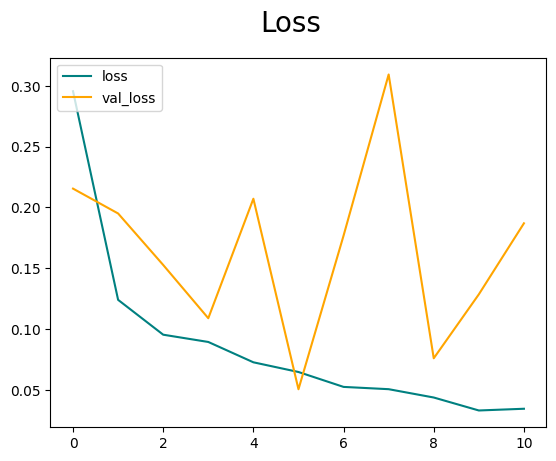

In [238]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

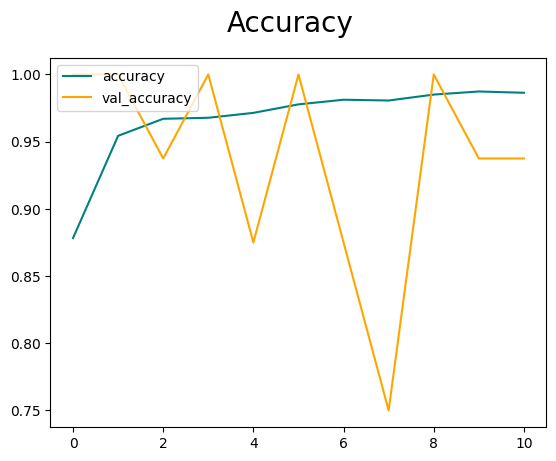

In [239]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [240]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [241]:
len(test_data)

20

In [242]:
for batch in test_data.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


In [243]:
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [244]:
print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}, F1 Score: {f1_score}')

Precision: 0.7563352584838867, Recall: 0.9948717951774597, Accuracy: 0.7964743375778198, F1 Score: 0.8593576393497974


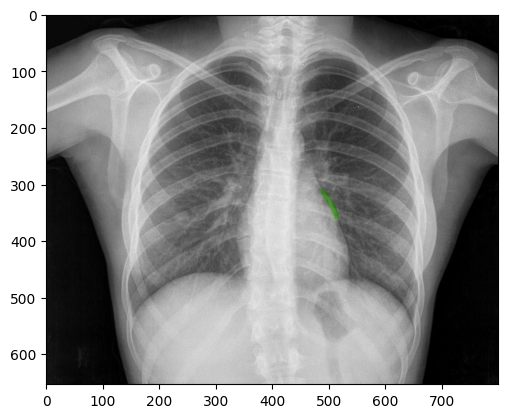

In [245]:
img = cv2.imread('TestImageNegative2.jpg')
plt.imshow(img)
plt.show()

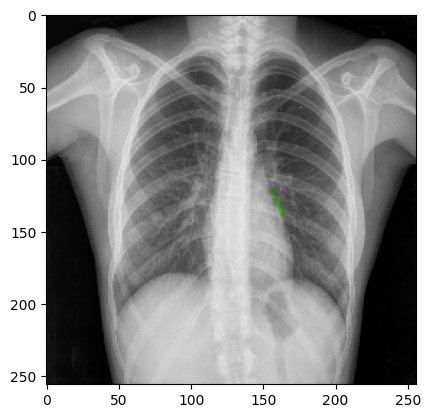

In [246]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [247]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [248]:
yhat

array([[0.16009618]], dtype=float32)

In [249]:
if yhat > 0.5: 
    print(f'Pneumonia')
else:
    print(f'No pneumonia')

No pneumonia


In [250]:
model.save(os.path.join('model','pneumoniaClassifier4.h5'))